In [11]:
#import common modules
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#import own modules
from source.matrix_creation import polynomial_features,scale_features_by_intercept_use
from source.matrix_creation import polynomial_features, standard_scaler, scale_features_by_intercept_use
from source.main_methods import OLS_parameters, Ridge_parameters, sklearn_lasso_regression, rescale_theta_intercept, predict_y, rescale_y
from source.GD_OLS import gradient_descent_OLS
from source.GD_Ridge import gradient_descent_ridge
from source.errors import MSE,R2
from source.plotting_exploration import plot_mse,plot_r2, explore_lambda, explore_polynomial_degree, lasso_grid_search, plot_theta_by_polynomials, plot_xy_xynoise_ypredicted, heatmap_variable_colwidth, plot_theta_by_polynomials_comparison



## Notebook for assignment 1 part e

Generating analysis plots for assignement 1 parte exploring Lasso regression. 

* Functions for the main methods can be found in source/main_methods.py
* Functions generating and scaling the feature matrix can be found in source/matrix_creation.py 
* Functions for calculating errors can be found in source/errors.py
* Functions for plotting and exploration can be found in source/plotting_exploration.py


### Setup for constants

In [19]:
# Runge's function - parameters to explore
n_datapoints = 1000
standard_deviation = 0.1 # for noise
p = 15 # polynomial degree

lambda_range = (-1,-5) # range of lambda values for np.log
lambda_n = 20 # number lambda values to explore
lambdas_start = np.logspace(lambda_range[0],lambda_range[1],lambda_n) # lambdas generated in logspace for learning rate

# Grid search
etas = [0.001, 0.005, 0.01, 0.05, 0.1] # gradient descent parameters

# tolerance criteria for gradient descent methods
tolerance = 1e-6
max_iterations = 1000

use_intercept = True 
create_plots = False
verbose_bool = False

np.random.seed(250)  # ensure reproducibility numpy
random_state_int = 42   # ensure reproducibility train_test_split

### Generate Runge's function data

In [20]:
# generating data without noise
x = np.linspace(-1, 1, num=n_datapoints)
y = 1 / (1 + 25 * x**2)

# generating data with noise
x_noise = x
y_noise = 1 / (1 + 25 * x_noise**2) + np.random.normal(0, standard_deviation, n_datapoints)

### Generate feature matrix, scale and split into training and test data

#### No noise

In [21]:
# creating design matrix with polynomial features: p
X = polynomial_features(x, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. 

# split x for plotting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state_int)
# test and train dataset, and scaling of X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_int)
X_train_scaled, X_test_scaled, X_train_mean, X_train_std = scale_features_by_intercept_use(X_train, X_test, use_intercept)
# scaling of y_train and y_test
y_train_scaled, y_test_scaled, y_train_mean, y_train_std = standard_scaler(y_train, y_test)

#### With noise

In [22]:
# creating design matrix with polynomial features: p
X_noise = polynomial_features(x_noise, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. Leaving intercept out since Ridge regression handles this

# test and train dataset, and scaling of X_train and X_test
x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x_noise, y_noise, test_size=0.2, random_state=random_state_int)
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, test_size=0.2, random_state = random_state_int)
X_train_scaled_noise, X_test_scaled_noise, X_mean, X_std = scale_features_by_intercept_use(X_train_noise, X_test_noise, use_intercept)
# scaling of y_train and y_test
y_train_scaled_noise, y_test_scaled_noise, y_train_mean_noise, y_train_std_noise = standard_scaler(y_train_noise, y_test_noise)

### Analysis

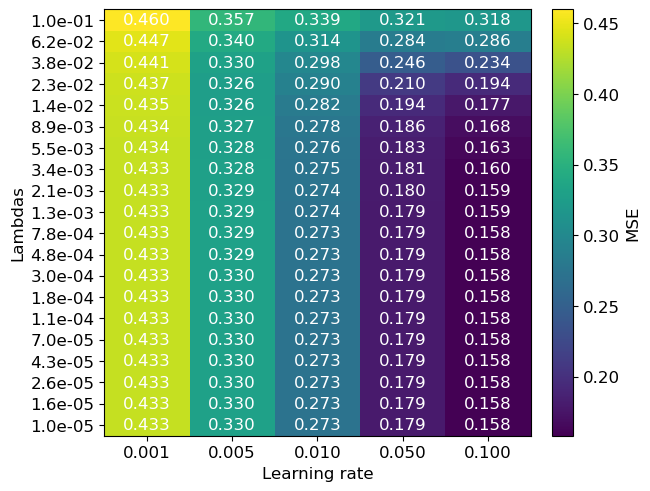

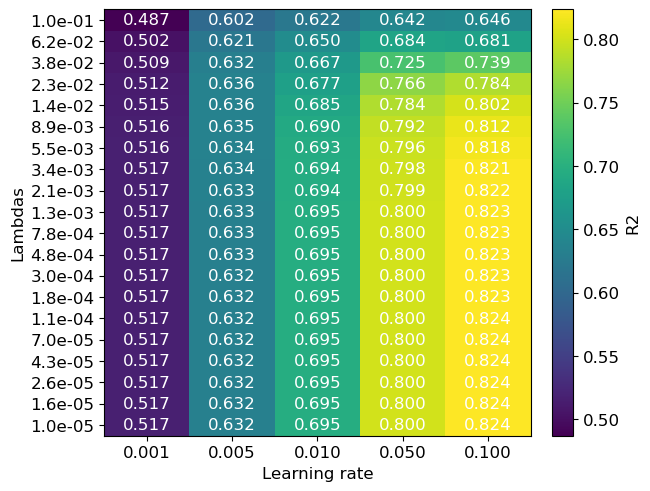

/home/jotje3041/miniconda3/envs/t2_electric_boogalo/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.310e+00, tolerance: 6.624e-05
  model = cd_fast.enet_coordinate_descent(
/home/jotje3041/miniconda3/envs/t2_electric_boogalo/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.969e+01, tolerance: 8.000e-04
  model = cd_fast.enet_coordinate_descent(


In [23]:
# Explore Lasso regression as function of lambdas and learning rate ----- Only used withot noise
lasso_grid, lasso_mse_train, lasso_mse_test, lasso_r2_train, lasso_r2_test, lasso_mse_values, lasso_r2_values = lasso_grid_search(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, lambdas_start, etas, tolerance, max_iterations, use_intercept, verbose=verbose_bool)
# rescaled coef and intercept as qc
rescaled_coef_lasso_noise, rescaled_intercept_lasso_noise = rescale_theta_intercept(lasso_grid['coef'][1:], lasso_grid['intercept'], y_train_std, y_train_mean, X_train_std, X_train_mean, verbose=verbose_bool)
y_predicted_scaled_lasso_noise = predict_y(X_test_scaled_noise[:, 1:], rescaled_coef_lasso_noise)
y_predicted_rescaled_lasso_noise = rescale_y(y_predicted_scaled_lasso_noise, y_train_std, y_train_mean)
if create_plots:
    plot_xy_xynoise_ypredicted(x, y, x_train_noise, y_train_noise, y_predicted_rescaled_lasso_noise, x_test, n_datapoints, "Lasso", p, True, lambda_n, 0, etas, max_iterations)    
    heatmap_variable_colwidth(lasso_mse_values, lambdas_start, etas, "MSE", p, n_datapoints, max_iterations)
    heatmap_variable_colwidth(lasso_r2_values, lambdas_start, etas, "R2", p, n_datapoints, max_iterations)

heatmap_variable_colwidth(lasso_mse_values, lambdas_start, etas, "MSE", p, n_datapoints, max_iterations)
heatmap_variable_colwidth(lasso_r2_values, lambdas_start, etas, "R2", p, n_datapoints, max_iterations)

# compare with lasso sklearn - use best alpha value from own implementation and calculation of lasso
if verbose_bool: print('lasso - not scaled')
RegLasso_coef_, RegLasso_intercept_ = sklearn_lasso_regression(X_train, y_train, lasso_grid['lambda'], use_intercept, max_iterations, tolerance, verbose=verbose_bool)
if verbose_bool: print('lasso - scaled')
RegLasso_coef_scaled, RegLasso_intercept_scaled = sklearn_lasso_regression(X_train_scaled, y_train_scaled, lasso_grid['lambda'], use_intercept, max_iterations, tolerance, verbose=verbose_bool)

if create_plots:
    # plot runges and theta by polynomials with scikit-learn to see suppressing theta values toward 0
    from sklearn.linear_model import Lasso
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train_scaled_sci = scaler.fit_transform(X_train)
    X_test_scaled_sci = scaler.fit_transform(X_test)
    lasso_model = Lasso(alpha=lasso_grid['lambda'], fit_intercept=True)
    lasso_model.fit(X_train_scaled_sci, y_train)
    y_pred = lasso_model.predict(X_test_scaled_sci)
    plot_xy_xynoise_ypredicted(x, y, x_train_noise, y_train_noise, y_pred, x_test, n_datapoints, "Lasso", p, True, lambda_n, 0, etas, max_iterations)

    # Ridge rescaled coefficients
    rescaled_coef_ridge_noise, rescaled_intercept_ridge_noise = rescale_theta_intercept(theta_ridge[-1][1:], theta_ridge[-1][0], y_train_std, y_train_mean, X_train_std, X_train_mean, verbose=verbose_bool)

    # Plot coefficients vs degree for - OLS, Ridge, Lasso gradient, Lasso coordinate
    regressions = np.array(['OLS', 'Ridge', 'Lasso gradient', 'Lasso coordinate'])
    degree_array_osl_ridge_lasso_degree15 = np.array([rescaled_coef_ols, rescaled_coef_ridge_noise, rescaled_coef_lasso_noise, lasso_model.coef_[1:]])
    plot_theta_by_polynomials_comparison(degree_array_osl_ridge_lasso_degree15, p, n_datapoints, regressions)

    # Plot coefficients vs degree for -  Ridge, Lasso gradient, Lasso coordinate
    regressions = np.array(['Ridge', 'Lasso gradient', 'Lasso coordinate'])
    degree_array_osl_ridge_lasso_degree15 = np.array([rescaled_coef_ridge_noise, rescaled_coef_lasso_noise, lasso_model.coef_[1:]])
    plot_theta_by_polynomials_comparison(degree_array_osl_ridge_lasso_degree15, p, n_datapoints, regressions)

    # Plot coefficients vs degree for -  Lasso gradient, Lasso coordinate
    regressions = np.array(['Lasso gradient', 'Lasso coordinate'])
    degree_array_osl_ridge_lasso_degree15 = np.array([rescaled_coef_lasso_noise, lasso_model.coef_[1:]])
    plot_theta_by_polynomials_comparison(degree_array_osl_ridge_lasso_degree15, p, n_datapoints, regressions)


    # Plot coefficients vs degree for -  Lasso coordinate
    regressions = np.array(['Lasso coordinate'])
    degree_array_osl_ridge_lasso_degree15 = np.array([lasso_model.coef_[1:]])
    plot_theta_by_polynomials_comparison(degree_array_osl_ridge_lasso_degree15, p, n_datapoints, regressions)


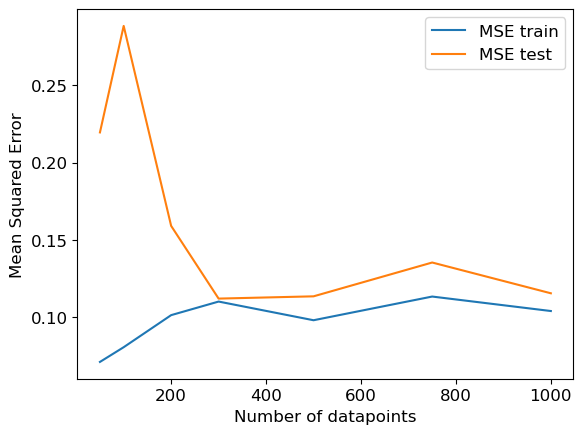

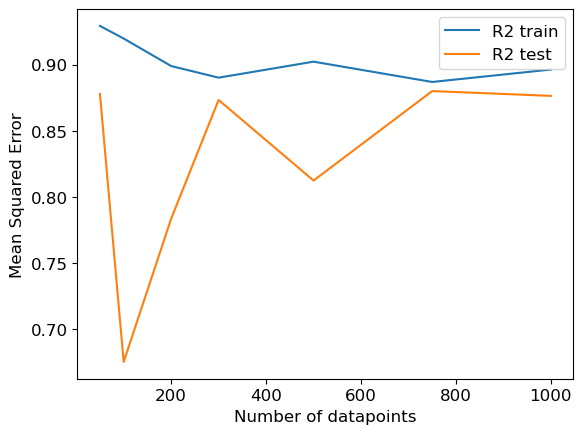

In [24]:
# OLS regression. MSE as function of data points
datapoints = np.array([50, 100, 200, 300, 500, 750, 1000])
standard_deviation = 0.1 # for noise
p = 15 # polynomial degree

np.random.seed(250)  # ensure reproducibility numpy
random_state_int = 42   # ensure reproducibility train_test_split

mse_train_by_datapints = []
mse_test_by_datapints = []

r2_train_by_datapints = []
r2_test_by_datapints = []

for n in datapoints:
    # generating data with noise
    x_noise = np.linspace(-1, 1, num=n)
    y_noise = 1 / (1 + 25 * x_noise**2) + np.random.normal(0, standard_deviation, n)

    # creating design matrix with polynomial features: p
    X_noise = polynomial_features(x_noise, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. Leaving intercept out since Ridge regression handles this

    # test and train dataset, and scaling of X_train and X_test
    x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x_noise, y_noise, test_size=0.2, random_state=random_state_int)
    X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, test_size=0.2, random_state = random_state_int)
    X_train_scaled_noise, X_test_scaled_noise, X_mean, X_std = scale_features_by_intercept_use(X_train_noise, X_test_noise, use_intercept)
    # scaling of y_train and y_test
    y_train_scaled_noise, y_test_scaled_noise, y_train_mean_noise, y_train_std_noise = standard_scaler(y_train_noise, y_test_noise)

    ### OLS
    # scaled data for features as input
    polynomial_degree, mse_train, mse_test, r2_train, r2_test, thetas_ols_noise = explore_polynomial_degree(X_train_scaled_noise, X_test_scaled_noise, y_train_scaled_noise, y_test_scaled_noise, p, use_intercept=use_intercept, verbose=verbose_bool)
    # rescaled coef and intercept as qc, calculated rescaled y_predict
    rescaled_coef_ols_noise, rescaled_intercept_ols_noise = rescale_theta_intercept(thetas_ols_noise[-1][1:], thetas_ols_noise[-1][0], y_train_std, y_train_mean, X_train_std, X_train_mean, verbose=verbose_bool)
    y_predicted_scaled_ols_noise = predict_y(X_test_scaled_noise[:, 1:], rescaled_coef_ols_noise)
    y_predicted_rescaled_ols_noise = rescale_y(y_predicted_scaled_ols_noise, y_train_std, y_train_mean)

    
    poly_degree = 15 - 1
    mse_train_by_datapints.append(mse_train[poly_degree])
    mse_test_by_datapints.append(mse_test[poly_degree])

    r2_train_by_datapints.append(r2_train[poly_degree])
    r2_test_by_datapints.append(r2_test[poly_degree])


import matplotlib.pyplot as plt
#plt.figure(figsize=(12, 6))
plt.plot(datapoints, mse_train_by_datapints, label='MSE train')
plt.plot(datapoints, mse_test_by_datapints, label='MSE test')
#plt.plot(x_axis_data, mse_test, label='MSE test')
plt.xlabel('Number of datapoints', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.legend(fontsize=12)

# Ensure tick labels also have fontsize=12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('OLS MSE vs datapoints.png', bbox_inches='tight')
plt.show()
plt.close()

plt.plot(datapoints, r2_train_by_datapints, label='R2 train')
plt.plot(datapoints, r2_test_by_datapints, label='R2 test')
#plt.plot(x_axis_data, mse_test, label='MSE test')
plt.xlabel('Number of datapoints', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.legend(fontsize=12)

# Ensure tick labels also have fontsize=12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('OLS MSE vs datapoints.png', bbox_inches='tight')
plt.show()
plt.close()